# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

## Machine Learning

## CUNEF

### 04/12/2020

## SVM Model

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix

In [2]:
X_train = pd.read_csv('../data/x_train.csv')
X_test = pd.read_csv('../data/x_test.csv')
Y_train = pd.read_csv('../data/y_train.csv')
Y_test = pd.read_csv('../data/y_test.csv')

Load the Pipeline

In [3]:
pl2 = '../pipelines/tratamiento1.sav'
tratamiento1 = pickle.load(open(pl2, 'rb'))

We build now the linear Support Vector Machine model

In [5]:
%%time

svm_m = Pipeline(steps=[
                       ('preprocesado', tratamiento1),
                       ('clasificador', SVC(random_state = 1789,
                                            kernel = 'rbf',
                                            max_iter = 3000))])

svm_m.fit(X_train, Y_train)

/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


CPU times: user 1min 39s, sys: 766 ms, total: 1min 40s
Wall time: 1min 42s


/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
      

As in the other models, we can check the score for this model. Doing this, we discover that it has the lowest value of all. 

In [5]:
svm_ml.score(X_train, Y_train)

0.7251779571172029

We found curious that the score is better for the test samples than for the train ones. it may be overfitting

In [8]:
svm_ml.score(X_test, Y_test)

0.6005279176102353

__Enhancing our SVM model__

We are not pleased enough with the first model we have built, so we will treat it in order to achieve better results:

In [27]:
%%time

svm_ml = Pipeline(steps=[
                        ('preprocesado', tratamiento1),
                        ('clasificador', SVC(random_state=1789,
                                             C=1.5,
                                             max_iter=2000,
                                             probability=True))])

svm_ml.fit(X_train, Y_train)

/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


CPU times: user 12min 40s, sys: 5.37 s, total: 12min 45s
Wall time: 12min 59s


/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
      

Recalculating both scores again, we get:

In [28]:
svm_ml.score(X_train, Y_train)

0.7251779571172029

In [29]:
svm_ml.score(X_test, Y_test)

0.7256198704726737

We have developed a better scored SVM model, and a 73% of accuracy lead us to think we are not commiting overfitting when enhancing the SVM model. 

Calculation of predictions and probabilities are represented down here: 

In [9]:
Y_pred = svm_ml.predict(X_test)

In [10]:
Y_pro = svm_ml.predict_proba(X_test)

Printing the results of SVM for the predicted data, we can notice that the accuracy about a 73%, but also:

+ If we set that somebody is not going to pay, we hit the result 45% of the cases.

+ Moreover, if we establish somebody is going to pay, we hit the 80% of the cases.

This model is not good for the problem we are treating, because we want to know who is not going to pay, and this model gives us a worse accuracy (45%) than if we threw a coin to the air.

In [32]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42     34886
           1       0.80      0.84      0.82    103772

    accuracy                           0.73    138658
   macro avg       0.63      0.61      0.62    138658
weighted avg       0.71      0.73      0.72    138658



Let's plot out the ROC curve, confusion matrices and cumulative gains curve to see their behaviour over the predicted data.

__ROC curve__

In [35]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(Y_test, Y_pro) # un roc con todas las metricas
    plt.title(f"ROCs curve for {title}.");

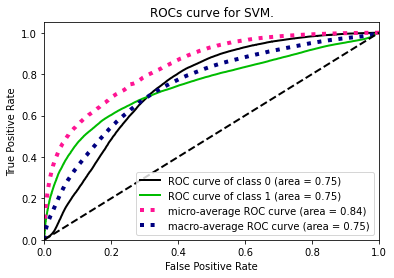

In [36]:
roc(svm_ml, 'SVM')

__Confusion Matrix__

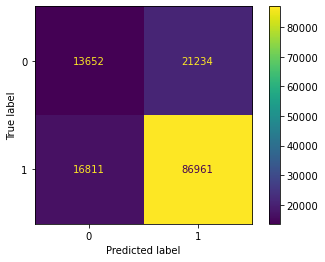

In [23]:
plot_confusion_matrix(svm_ml, X=X_test, y_true=Y_test);

__Normalized Confusion Matrix__:

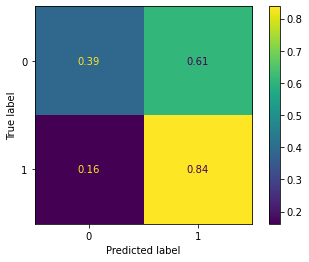

In [11]:
plot_confusion_matrix(svm_ml, X=X_test, y_true=Y_test, normalize='true');

We can check here what I said in the _classification _ report_ chunk. The model is not good for this problem

Saving the model:

In [40]:
model = '../modelos/svm.sav'
pickle.dump(svm_ml, open(model, 'wb'))

### References

+ https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
+ https://docs.python.org/3/library/pickle.html
+ https://scikit-learn.org/stable/modules/svm.html